# Importar las librerías

In [3]:
from google.colab import drive
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os
import numpy as np
import cv2
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pre procesado de datos

### Cargar el dataset

In [5]:
# Definicion de directorio train y test
train_dir = '/content/drive/MyDrive/DataScience/ChallengerHenry/ClasificadorHuesos/train'
test_dir = '/content/drive/MyDrive/DataScience/ChallengerHenry/ClasificadorHuesos/test'

print(os.listdir(train_dir))
print(os.listdir(test_dir))

['Sano', 'Fracturado']
['Sano', 'Fracturado']


In [6]:
# Definicion de categorias 0 -> SAno y 1 -> Fractura
clases = ['Sano','Fracturado']

# Definicion de pixeles de la imagen
TARGET_SIZE = 100

# Normalización de las imágenes

In [7]:
# Funcion que establece un conjunto de características o propiedades a cada
# imagen con el proposito de facilitar su gestión, análisis y uso posterior utilizacion

def cargar_datos_desde_directorio(directorio):
    imagenes = []
    etiquetas = []

    for etiqueta in clases:
        ruta_directorio = os.path.join(directorio, etiqueta)
        for archivo in os.listdir(ruta_directorio):
            if archivo.endswith('.png') or archivo.endswith('.jpg'):
                ruta_imagen = os.path.join(ruta_directorio, archivo)
                imagen = load_img(ruta_imagen, target_size=(TARGET_SIZE, TARGET_SIZE))
                arreglo_imagenes = img_to_array(imagen) / 255.0
                imagenes.append(arreglo_imagenes)
                etiquetas.append(0 if etiqueta == 'Sano' else 1)
    return np.array(imagenes), np.array(etiquetas)

In [8]:
# Cargar datos de entrenamiento y prueba
X_train, y_train = cargar_datos_desde_directorio(train_dir)
X_test, y_test = cargar_datos_desde_directorio(test_dir)

In [9]:
print(f"Dimensiones : X_train {X_train.shape} | y_train {y_train.shape}" )
print(f"Dimensiones : X_train {X_test.shape} | y_train {y_test.shape}" )

Dimensiones : X_train (555, 100, 100, 3) | y_train (555,)
Dimensiones : X_train (555, 100, 100, 3) | y_train (555,)


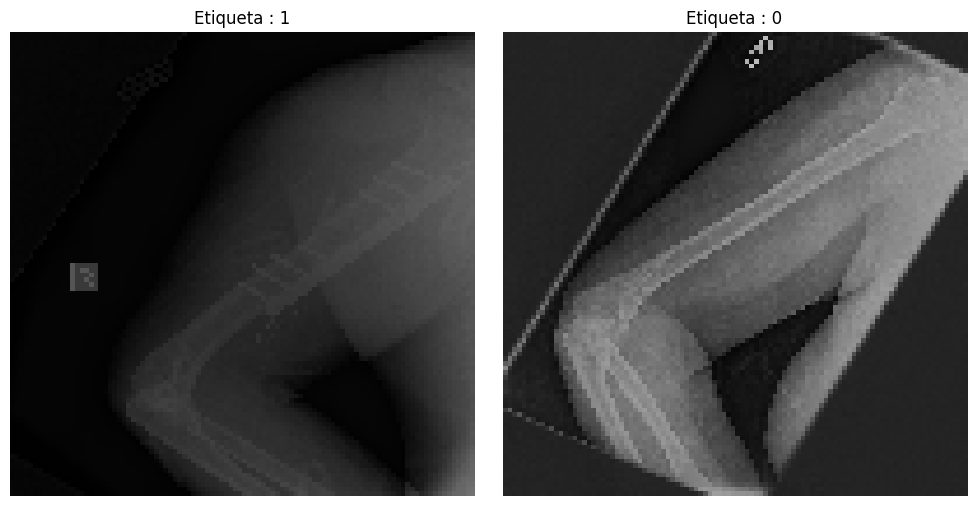

In [11]:
# Seleccionar dos imagenes del conjunto para ser mostrados
random_indices = np.random.choice(len(X_train), size=2, replace=False)

# Inicializar listas para las imágenes y etiquetas
imagenes = []
etiquetas = []

# Obtener imágenes y etiquetas que se mostraran
for indice in random_indices:
    imagenes.append(X_train[indice])
    etiquetas.append(f'Etiqueta : {y_train[indice]}')

# Mostrar las imágenes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for ax, imagen, etiqueta in zip(axes, imagenes, etiquetas):
    ax.imshow(imagen)
    ax.set_title(etiqueta)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Construir la red neuronal convolucional

## Definir el modelo

In [12]:
modelo = tf.keras.models.Sequential()

### Añadir la primera capa de convolución

Hyperparámetros para la capa RNC:

- Filtros: 32
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu
- input_shape: (32, 32, 3)                                        |

In [13]:
modelo.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[TARGET_SIZE, TARGET_SIZE, 3]))

### Agregar segunda capa de convolucional y capa max-pooling

Hyperparámetros para la capa RNC:

- Filtros: 32
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

In [14]:
modelo.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

Hyperparámetros para la capa de MaxPool:

- pool_size: 2
- strides: 2
- padding: valid


In [15]:
modelo.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Añadir la tercera capa convolucional

Hyperparámetros para la capa RNC:

- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

In [16]:
modelo.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Añadir la cuarta capa convolucional y la capa de max-pooling

Hyperparámetros para la capa RNC:

- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

In [17]:
modelo.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

Hyperparámetros para la capa de MaxPool:

- pool_size: 2
- strides: 2
- padding: valid

In [18]:
modelo.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Añadir la capa de flattening


In [19]:
modelo.add(tf.keras.layers.Flatten())

### Añadir la primera capa fully-connected

Hyperparámetros para la capa totalmente conectada:

- units/neurons: 128
- activation: relu

In [20]:
modelo.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Añadir la capa de salida

Hyperparámetros para la capa totalmente conectada:

- units/neurons: 2 (numero de clases)
- activation: softmax

In [23]:
modelo.add(tf.keras.layers.Dense(units=2, activation='softmax'))

In [24]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 40000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,120,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,185,960 (19.78 MB)

 Trainable params: 5,185,960 (19.78 MB)

 Non-trainable params: 0 (0.00 B)

# Compilar el modelo

In [25]:
modelo.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

# Guardar el modelo

In [26]:
# Guardar el modelo en un archivo HDF5
ruta = '/content/drive/MyDrive/DataScience/ChallengerHenry/ClasificadorHuesos/modelo'
modelo.save(os.path.join(ruta, 'clasificadorHSR.h5'))

# Cargar el modelo guardado
#modelo = load_model(os.path.join(ruta, 'clasificadorHSR.h5'))

# Entrenar el modelo

In [27]:
modelo.fit(X_train, y_train, epochs=5)

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - loss: 0.6270 - sparse_categorical_accuracy: 0.6834
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - loss: 0.6065 - sparse_categorical_accuracy: 0.7052
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - loss: 0.5787 - sparse_categorical_accuracy: 0.7381
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 0.5987 - sparse_categorical_accuracy: 0.7143
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - loss: 0.6192 - sparse_categorical_accuracy: 0.6903


In [ ]:
test_loss, test_accuracy = modelo.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 450ms/step - loss: 0.5884 - sparse_categorical_accuracy: 0.7797


In [ ]:
print(f"Precisión de la prueba: {test_accuracy}")

Precisión de la prueba: 0.6360360383987427


# Predecir

In [ ]:
def preprocesar_(ruta_imagen):
    imagen = image.load_img(ruta_imagen, target_size=(100, 100))
    imagen_array = image.img_to_array(imagen)
    imagen_array = np.expand_dims(imagen_array, axis=0)
    imagen_array /= 255.0

    return imagen_array

In [ ]:
ruta_imagen = '/content/drive/MyDrive/DataScience/ChallengerHenry/ClasificadorHuesos/predecir/imagen_predecir4.jpg'

In [ ]:
# Preprocesar la imagen
imagen_preprocesada = preprocesar_(ruta_imagen)
# Realizar la predicción
prediccion = modelo.predict(imagen_preprocesada)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


In [ ]:
limite = 0.5
if prediccion[0][0] > limite:
    print("Predicción: Hueso Fracturado")
else:
    print("Predicción: Hueso Sano")

Predicción: Hueso Fracturado


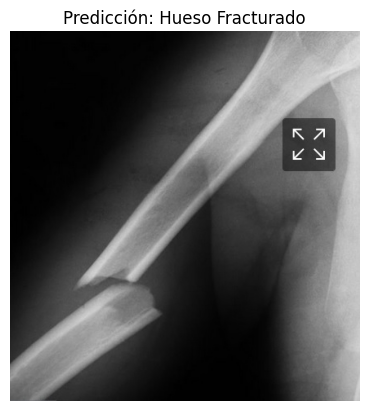

In [ ]:
# Mostrar la imagen
plt.imshow(image.load_img(ruta_imagen))
plt.title("Predicción: " + ("Hueso Fracturado" if prediccion[0][0] > limite else "Hueso Sano"))
plt.axis('off')
plt.show()